In [ ]:
data = [{'price': 850000, 'rooms' : 4, 'neighborhood' : 'Queen Anne'},
        {'price': 950000, 'rooms' : 3, 'neighborhood' : 'Fremont'},
        {'price': 1750000, 'rooms' : 3, 'neighborhood' : 'Wallingford'},
        {'price': 650000, 'rooms' : 2, 'neighborhood' : 'Fremont'}]

In [ ]:
{'Queen Anne' : 1, 'Fremont' : 2, 'Wallingford' : 3}

{'Fremont': 2, 'Queen Anne': 1, 'Wallingford': 3}

In [ ]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse = False, dtype = int)
vec.fit_transform(data)

array([[      0,       1,       0,  850000,       4],
       [      1,       0,       0,  950000,       3],
       [      0,       0,       1, 1750000,       3],
       [      1,       0,       0,  650000,       2]])

In [ ]:
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

In [1]:
import numpy as np
import pandas as pd


In [ ]:
data_example= {
    'header' : ['topic+','topic+','topic-','topic+','topic-','topic-','topic+','topic-','topic+','topic+'],
    'key_words':['<50%','>50%','>50%','>50%','<50%','>50%','<50%','>50%','>50%','>50%'],
    'topic':['no','no','yes','no','yes','no','yes','no','yes','yes'],
    'article':['no','rel','rel','rel','no','rel','rel','no','no','rel']
}

In [ ]:
df_b = pd.DataFrame(data_example,columns=['header','key_words','topics','article'])
df_b

,header,key_words,topics,article
0,topic+,<50%,NaN,no
1,topic+,>50%,NaN,rel
2,topic-,>50%,NaN,rel
3,topic+,>50%,NaN,rel
4,topic-,<50%,NaN,no
5,topic-,>50%,NaN,rel
6,topic+,<50%,NaN,rel
7,topic-,>50%,NaN,no
8,topic+,>50%,NaN,no
9,topic+,>50%,NaN,rel


In [ ]:
f1=lambda x:1 if x == 'rel' else 0

In [ ]:
df_b_X=df_b.loc[:,'header':'topics']
df_b_X

,header,key_words,topics
0,topic+,<50%,NaN
1,topic+,>50%,NaN
2,topic-,>50%,NaN
3,topic+,>50%,NaN
4,topic-,<50%,NaN
5,topic-,>50%,NaN
6,topic+,<50%,NaN
7,topic-,>50%,NaN
8,topic+,>50%,NaN
9,topic+,>50%,NaN


In [ ]:
df_b_y=df_b.loc[:,'article']
df_b_y

0     no
1    rel
2    rel
3    rel
4     no
5    rel
6    rel
7     no
8     no
9    rel
Name: article, dtype: object

In [ ]:
f1=lambda x:1 if x=='rel' else 0

In [ ]:
df_b_y1=df_b_y.map(f1)
df_b_y1

0    0
1    1
2    1
3    1
4    0
5    1
6    1
7    0
8    0
9    1
Name: article, dtype: int64

In [ ]:
df_with_dummies = pd.get_dummies(df_b_X)
df_with_dummies

,header_topic+,header_topic-,key_words_<50%,key_words_>50%
0,1,0,1,0
1,1,0,0,1
2,0,1,0,1
3,1,0,0,1
4,0,1,1,0
5,0,1,0,1
6,1,0,1,0
7,0,1,0,1
8,1,0,0,1
9,1,0,0,1


In [9]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = keras.Sequential([
                          layers.Dense(units=4,activation='relu',input_shape=[2]),
                          layers.Dense(units=3,activation='relu'),
                          layers.Dense(units=1)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [2]:
concrete = pd.read_csv('concrete.csv')
concrete.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
concrete.shape

(1030, 9)

In [ ]:
input_shape = concrete.shape[1]-1
input_shape

8

In [ ]:
model1 = keras.Sequential([
                          layers.Dense(units=512,activation='relu',input_shape=[input_shape]),
                          layers.Dense(units=512,activation='relu'),
                          layers.Dense(units=512,activation='relu'),
                          layers.Dense(units=1)
])

In [ ]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               4608      
_________________________________________________________________
dense_12 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 513       
Total params: 530,433
Trainable params: 530,433
Non-trainable params: 0
_________________________________________________________________


In [3]:
df_wine = pd.read_csv('winequality-red.csv')
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df_train = df_wine.sample(frac=0.7,random_state=0)
df_valid = df_wine.drop(df_train.index)
print(df_train.shape, df_valid.shape)

(1119, 12) (480, 12)


In [5]:
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

In [6]:
df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,0.548673,0.239726,0.544304,0.092308,0.237435,0.366197,0.212014,0.619193,0.291262,0.260606,0.369231,0.6
1032,0.309735,0.479452,0.000000,0.246154,0.105719,0.056338,0.028269,0.645088,0.475728,0.121212,0.184615,0.4
1002,0.398230,0.116438,0.417722,0.088462,0.050260,0.169014,0.074205,0.387662,0.378641,0.309091,0.507692,0.8
487,0.495575,0.359589,0.455696,0.069231,0.032929,0.056338,0.028269,0.619193,0.291262,0.054545,0.246154,0.6
979,0.672566,0.226027,0.620253,0.038462,0.071057,0.028169,0.000000,0.520183,0.252427,0.181818,0.307692,0.4


In [7]:
df_valid.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.000000,0.076923,0.072790,0.140845,0.098940,0.588728,0.621359,0.139394,0.153846,0.4
3,0.584071,0.109589,0.708861,0.076923,0.071057,0.225352,0.190813,0.603960,0.281553,0.151515,0.215385,0.6
7,0.238938,0.363014,0.000000,0.023077,0.053726,0.197183,0.053004,0.345011,0.504854,0.084848,0.246154,0.8
11,0.256637,0.260274,0.455696,0.400000,0.064125,0.225352,0.339223,0.588728,0.466019,0.284848,0.323077,0.4
23,0.345133,0.253425,0.139241,0.107692,0.086655,0.112676,0.215548,0.512567,0.291262,0.121212,0.153846,0.4


In [8]:
X_train = df_train.drop('quality',axis=1)
X_valid = df_valid.drop('quality',axis=1)
Y_train = df_train['quality']
Y_valid = df_valid['quality']

In [10]:
X_train.shape

(1119, 11)

In [20]:
X_valid.shape

(480, 11)

In [15]:
modelRW= keras.Sequential([
                           layers.Dense(units=512, activation='relu', input_shape=[11]),
                           layers.Dense(units=512, activation='relu'),
                           layers.Dense(units=512, activation='relu'),
                           layers.Dense(units=1),
])

In [16]:
modelRW.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               6144      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 531,969
Trainable params: 531,969
Non-trainable params: 0
_________________________________________________________________


In [17]:
modelRW.compile(optimizer='adam',loss='mae')

In [18]:
history = modelRW.fit(
    X_train,Y_train,
    validation_data=(X_valid,Y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 [==============================] - 1s 66ms/step - loss: 0.2614 - val_loss: 0.1324
Epoch 2/10
5/5 [==============================] - 0s 26ms/step - loss: 0.1313 - val_loss: 0.1180
Epoch 3/10
5/5 [==============================] - 0s 28ms/step - loss: 0.1170 - val_loss: 0.1135
Epoch 4/10
5/5 [==============================] - 0s 26ms/step - loss: 0.1091 - val_loss: 0.1039
Epoch 5/10
5/5 [==============================] - 0s 27ms/step - loss: 0.1065 - val_loss: 0.1047
Epoch 6/10
5/5 [==============================] - 0s 25ms/step - loss: 0.1049 - val_loss: 0.1113
Epoch 7/10
5/5 [==============================] - 0s 25ms/step - loss: 0.1068 - val_loss: 0.1025
Epoch 8/10
5/5 [==============================] - 0s 26ms/step - loss: 0.1031 - val_loss: 0.1029
Epoch 9/10
5/5 [==============================] - 0s 25ms/step - loss: 0.1039 - val_loss: 0.1022
Epoch 10/10
5/5 [==============================] - 0s 27ms/step - loss: 0.1001 - val_loss: 0.1074


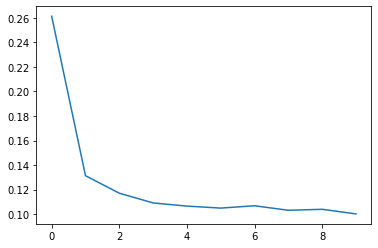

In [19]:
history_df = pd.DataFrame(history.history)
history_df['loss'].plot()